<a href="https://colab.research.google.com/github/sejalraikwa/Minor-Project/blob/main/Accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Traffic Accidents and Vehicles**

**Introduction**

The goal of this project is the investigate what causes Serious and Fatal accidents in hopes of preventing and decreasing the number of them. The dataset consists of accident records from the UK over the course of 15+ years. I hope to show the causes of these accidents through visualizations and create an algorithm that can predict the severity of accidents.

**Importing and Data Merging**

In [ ]:
#Import modules
import numpy as np
import holidays
import pandas as pd
import seaborn as sns
import pickle
import time
import timeit


import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

import datetime
import math
from collections import Counter

#scipy
import scipy.stats as stats
from scipy import stats
from scipy.stats import chi2_contingency

#sklearn
import sklearn
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample


In [ ]:
#for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score



#imblearn
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

#webscraping
import requests
from bs4 import BeautifulSoup
import re
import urllib
from IPython.core.display import HTML

#time series
import statsmodels.api as sm
from pylab import rcParams
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA


#warning ignorer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#import files


ac = pd.read_csv(r'/content/Accident_Information.csv', low_memory=False, chunksize=30000, on_bad_lines='skip')
vc = pd.read_csv(r'/content/Vehicle_Information.csv', low_memory=False, chunksize=30000, encoding='latin-1')

#chunk cleaning and dataframing for accident column
acchunk = []
for chunk in ac:
    acchunk_filter = chunk[
        (chunk.Year.astype(int) >= 2010) &
        (chunk.Year.astype(int) <= 2017) &
        (chunk['Road_Type'] != "Unknown") &
        (chunk['Junction_Control'] != "Data missing or out of range") &
        (chunk['Carriageway_Hazards'] != "Data missing or out of range") &
        (chunk['Junction_Detail'] != "Data missing or out of range") &
        (chunk['Road_Surface_Conditions'] != "Data missing or out of range") &
        (chunk['Special_Conditions_at_Site'] != "Data missing or out of range") &
        (chunk['Weather_Conditions'] != "Data missing or out of range") &
        (chunk['Latitude'].notnull()) &
        (chunk['Longitude'].notnull())
    ]
    acchunk.append(acchunk_filter)
df1 = pd.concat(acchunk)

#chunk cleaning for vehicles column
vcchunk = []
for chunk2 in vc:
    vcchunk_filter = chunk2[
        (chunk2.Year.astype(int) >= 2010)&
        (chunk2.Year.astype(int) <= 2017) &
        (chunk2['Driver_Home_Area_Type'] != "Data missing or out of range") &
        (chunk2['Journey_Purpose_of_Driver'] != "Data missing or out of range") &
        (chunk2['Junction_Location'] != "Data missing or out of range") &
        (chunk2['Was_Vehicle_Left_Hand_Drive'] != "Data missing or out of range") &
        (chunk2['Hit_Object_in_Carriageway'] != "Data missing or out of range") &
        (chunk2['Skidding_and_Overturning'] != "Data missing or out of range") &
        (chunk2['Towing_and_Articulation'] != "Data missing or out of range") &
        (chunk2['Vehicle_Leaving_Carriageway'] != "Data missing or out of range") &
        (chunk2['Vehicle_Manoeuvre'] != "Data missing or out of range") &
        (chunk2['Vehicle_Type'] != "Data missing or out of range") &
        (chunk2['X1st_Point_of_Impact'] != "Data missing or out of range") &
        (chunk2['Sex_of_Driver'] != "Data missing or out of range") &
        (chunk2['Age_Band_of_Driver'] != "Data missing or out of range")

    ]
    vcchunk.append(vcchunk_filter)
df2 = pd.concat(vcchunk)

In [ ]:
#check columns
print("Accident's Columns:\n",df1.columns, "\n")

print("Vehicle's Columns:\n",df2.columns)

Accident's Columns:
 Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object') 

Vehicle's Columns:
 Index(['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', '

In [ ]:
print('Accident Shape', df1.shape)
print('Vehicle Shape',df2.shape)

Accident Shape (691195, 34)
Vehicle Shape (1167198, 24)


In [ ]:
#merge dataframes
df = pd.merge(df1,df2)

In [ ]:
#check columns
print("Names of Combined Columns:\n",df.columns, "\n")
print("\nShape:\n",df.shape)

Names of Combined Columns:
 Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit

In [ ]:
df.describe(include ='all')

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact
count,720280,720280,720280.000000,699431,710979.000000,720280,6212,720280,720280,720279.000000,...,720280,60538,720280,720280,720269.000000,720280,720280.000000,720280,720280,720280
unique,488010,6,NaN,6,NaN,3,5,2557,7,NaN,...,3,5,6,9,NaN,18,NaN,20,2,5
top,2016140142191,A,NaN,Unclassified,NaN,Slight,Other object on road,2015-05-13,Friday,NaN,...,Male,Skidded,No tow/articulation,Did not leave carriageway,NaN,Going ahead other,NaN,Car,No,Front
freq,15,365390,NaN,473098,NaN,626656,2558,515,119324,NaN,...,484205,46138,713570,663463,NaN,314008,NaN,534189,719140,354438
mean,NaN,NaN,1051.470728,NaN,607.761499,NaN,NaN,NaN,NaN,1.147353,...,NaN,NaN,NaN,NaN,0.086026,NaN,1.506420,NaN,NaN,NaN
std,NaN,NaN,1825.784600,NaN,1593.978070,NaN,NaN,NaN,NaN,0.357791,...,NaN,NaN,NaN,NaN,0.784117,NaN,0.644346,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,191.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,NaN,900.000000,NaN,173.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN,NaN


In [ ]:
#check corr b/t Location_Easting_OSGR & Location_Northing_OSGR AND Longitude and Latitude

print(df['Location_Easting_OSGR'].corr(df['Longitude']))


print(df['Location_Northing_OSGR'].corr(df['Latitude']))

0.9994257015446226
0.9999733124707404


In [ ]:
df = df.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'], axis=1)

In [ ]:
df.shape

(720280, 54)

In [ ]:
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace('.','')
df.columns = df.columns.str.replace('(','')
df.columns = df.columns.str.replace(')','')

In [ ]:
#convert date/time to datetime datatype

df['date'] = pd.to_datetime((df['date']), format= "%Y-%m-%d")

In [ ]:
df[['did_police_officer_attend_scene_of_accident',
    'driver_imd_decile','vehicle_reference',
    'vehicle_locationrestricted_lane','1st_road_number',
    '2nd_road_number',
    'pedestrian_crossing-physical_facilities',
   'pedestrian_crossing-human_control']]= df[['did_police_officer_attend_scene_of_accident',
    'driver_imd_decile','vehicle_reference',
    'vehicle_locationrestricted_lane','1st_road_number',
    '2nd_road_number',
    'pedestrian_crossing-physical_facilities',
   'pedestrian_crossing-human_control']].astype('object')

In [ ]:
df.columns.to_series().groupby(df.dtypes).groups

{datetime64[ns]: ['date'], int64: ['number_of_casualties', 'number_of_vehicles', 'year'], float64: ['latitude', 'longitude', 'speed_limit', 'age_of_vehicle', 'engine_capacity_cc'], object: ['accident_index', '1st_road_class', '1st_road_number', '2nd_road_class', '2nd_road_number', 'accident_severity', 'carriageway_hazards', 'day_of_week', 'did_police_officer_attend_scene_of_accident', 'junction_control', 'junction_detail', 'light_conditions', 'local_authority_district', 'local_authority_highway', 'lsoa_of_accident_location', 'pedestrian_crossing-human_control', 'pedestrian_crossing-physical_facilities', 'police_force', 'road_surface_conditions', 'road_type', 'special_conditions_at_site', 'time', 'urban_or_rural_area', 'weather_conditions', 'inscotland', 'age_band_of_driver', 'driver_home_area_type', 'driver_imd_decile', 'hit_object_in_carriageway', 'hit_object_off_carriageway', 'journey_purpose_of_driver', 'junction_location', 'make', 'model', 'propulsion_code', 'sex_of_driver', 'skidd

In [ ]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

,0
carriageway_hazards,99.137558
special_conditions_at_site,98.133087
hit_object_in_carriageway,96.883573
hit_object_off_carriageway,94.413561
skidding_and_overturning,91.595213
driver_imd_decile,25.118565
age_of_vehicle,15.287805
model,11.636447
engine_capacity_cc,11.283251
propulsion_code,10.899928


In [ ]:
# #2nd_road_class
df['2nd_road_class'].value_counts()/df.shape[0]*100

,count
2nd_road_class,
Unclassified,65.682512
A,15.892292
C,7.591909
B,6.494558
Motorway,1.301716
A(M),0.142445


In [ ]:
df = df.drop(['2nd_road_class'], axis=1)

In [ ]:
df['driver_imd_decile'].value_counts()/df.shape[0]*100

,count
driver_imd_decile,
2.0,8.366469
3.0,8.281640
4.0,7.986339
1.0,7.888321
5.0,7.717554
6.0,7.530683
7.0,7.195674
8.0,6.948270
9.0,6.803049


In [ ]:
df['driver_imd_decile'].fillna(method='ffill', inplace=True)

In [ ]:
df['age_of_vehicle'].describe()

,age_of_vehicle
count,610165.000000
mean,7.567473
std,4.751567
min,1.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,105.000000


In [ ]:
df['age_of_vehicle'].median()

7.0

In [ ]:
#fillna by 7
df['age_of_vehicle'].fillna(7, inplace=True)

#group age_of_vehicle
#1=0-3, 2=3-5, 3=5-8, 4=8-11, 5=
def fixedvehicleage(age):
    if age>=0 and age<=120:
        return age
    else:
        return np.nan

df['age_of_vehicle'] = df['age_of_vehicle'].apply(fixedvehicleage)


df['age_of_vehicle'] = pd.cut(df['age_of_vehicle'],
                             [0,2,5,8,11,14,17,120], labels=['1', '2', '3','4','5','6','7'])

In [ ]:
#model
df['model'].value_counts()/df.shape[0]*100

,count
model,
MISSING,0.743183
KA,0.336675
CLIO DYNAMIQUE 16V,0.279058
FIESTA ZETEC,0.247681
SPRINTER 313 CDI,0.236158
...,...
INDEPENDENCE S PLUS,0.000139
E7 XS AUTO,0.000139
S40 SE LUX D3,0.000139


In [ ]:
df['model'].describe()

,model
count,636465
unique,28664
top,MISSING
freq,5353


In [ ]:
df['model'].fillna(method='ffill', inplace=True)

In [ ]:
#engine_capacity_cc
df['engine_capacity_cc'].describe()

,engine_capacity_cc
count,639009.000000
mean,1848.094816
std,1573.057956
min,2.000000
25%,1248.000000
50%,1598.000000
75%,1995.000000
max,91000.000000


In [ ]:
#first I'm going to handle both ends of outliers.
#(determine the min and max cuttoffs for detecting the outlier)
q75, q25 = np.percentile(df['engine_capacity_cc'].dropna(), [75 ,25])
iqr = q75 - q25

ecmin = q25 - (iqr*1.5)
ecmax = q75 + (iqr*1.5)

print(ecmax)
print(ecmin)

3115.5
127.5


In [ ]:
df = df[df['engine_capacity_cc']<=ecmax]

In [ ]:
df = df[df['engine_capacity_cc']>=ecmin]

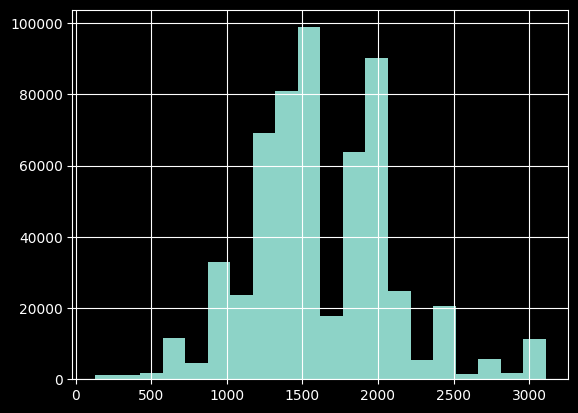

In [ ]:
df['engine_capacity_cc'].hist(bins=20)
plt.style.use('dark_background')

In [ ]:
#check values of 'engine_capacity_cc'
df['engine_capacity_cc'].describe()

,engine_capacity_cc
count,569057.000000
mean,1633.351432
std,473.765085
min,128.000000
25%,1299.000000
50%,1598.000000
75%,1968.000000
max,3110.000000


In [ ]:
df['engine_capacity_cc'].mean()

np.float64(1633.3514322818276)

In [ ]:
df['engine_capacity_cc'].fillna(1652, inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

,0
carriageway_hazards,99.172491
special_conditions_at_site,98.139905
hit_object_in_carriageway,96.792237
hit_object_off_carriageway,93.836646
skidding_and_overturning,92.130490
lsoa_of_accident_location,5.902045
2nd_road_number,1.317618
make,0.063087
pedestrian_crossing-human_control,0.005448
pedestrian_crossing-physical_facilities,0.005096


In [ ]:
df['lsoa_of_accident_location'].value_counts()

,count
lsoa_of_accident_location,
E01032739,440
E01004736,412
E01000004,410
E01018648,303
E01004689,261
...,...
E01015424,1
E01015485,1
W01001188,1


In [ ]:
df['lsoa_of_accident_location'].describe()

,lsoa_of_accident_location
count,535471
unique,33936
top,E01032739
freq,440


In [ ]:
df['lsoa_of_accident_location'].fillna(method='ffill', inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

,0
carriageway_hazards,99.172491
special_conditions_at_site,98.139905
hit_object_in_carriageway,96.792237
hit_object_off_carriageway,93.836646
skidding_and_overturning,92.130490
2nd_road_number,1.317618
make,0.063087
pedestrian_crossing-human_control,0.005448
pedestrian_crossing-physical_facilities,0.005096
time,0.003866


In [ ]:
#drop the remaining nulls that are <1%
df.dropna(inplace=True)

#last check
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

,0
accident_index,0.0
1st_road_class,0.0
1st_road_number,0.0
2nd_road_number,0.0
accident_severity,0.0
carriageway_hazards,0.0
date,0.0
day_of_week,0.0
did_police_officer_attend_scene_of_accident,0.0
junction_control,0.0


In [ ]:
df.shape

(17, 53)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 38426 to 712709
Data columns (total 53 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   accident_index                               17 non-null     object        
 1   1st_road_class                               17 non-null     object        
 2   1st_road_number                              17 non-null     object        
 3   2nd_road_number                              17 non-null     object        
 4   accident_severity                            17 non-null     object        
 5   carriageway_hazards                          17 non-null     object        
 6   date                                         17 non-null     datetime64[ns]
 7   day_of_week                                  17 non-null     object        
 8   did_police_officer_attend_scene_of_accident  17 non-null     object        
 9 

In [ ]:
df_num = df[['engine_capacity_cc','number_of_casualties','number_of_vehicles','speed_limit']]

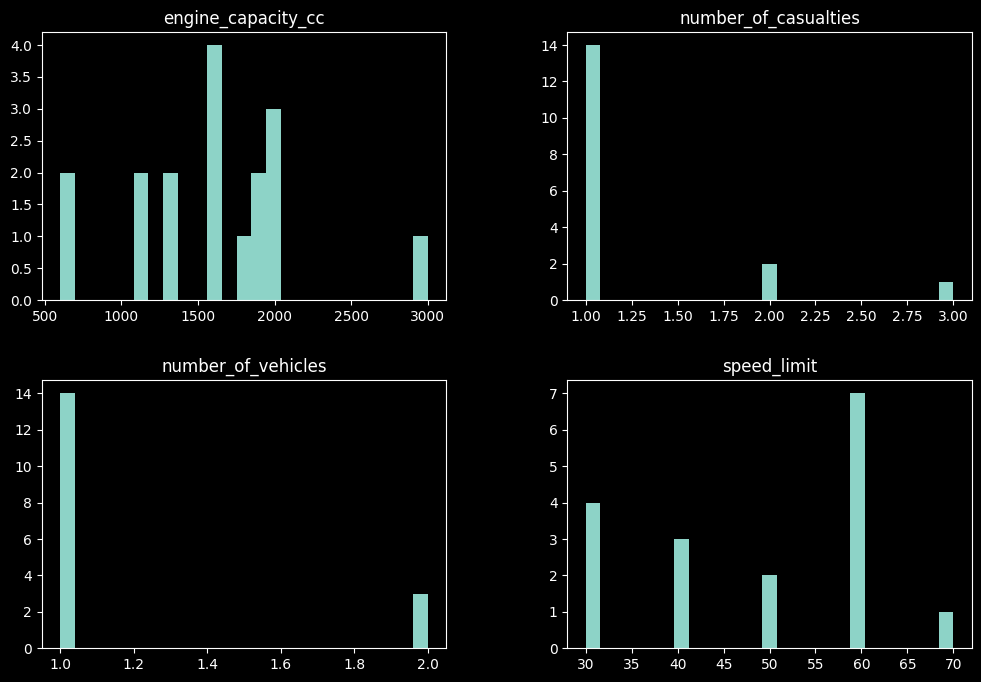

In [ ]:
df_num.hist( bins=25, grid=False, figsize=(12,8))
plt.style.use('dark_background')

In [ ]:
df['number_of_casualties'].value_counts()

,count
number_of_casualties,
1,14
2,2
3,1


In [ ]:
def casualities(num_cas):
    if num_cas >=1 and num_cas <2:
        return "1"
    elif num_cas >=2 and num_cas <3:
        return "2"
    elif num_cas >=3 and num_cas <4:
        return "3"
    elif num_cas >= 4 and num_cas <5:
        return "4"
    elif num_cas >= 5:
        return "5+"


In [ ]:
df['number_of_casualties']= df['number_of_casualties'].apply(casualities)

In [ ]:
df['number_of_casualties'].value_counts()

,count
number_of_casualties,
1,14
2,2
3,1


In [ ]:
df['propulsion_code'].value_counts()/df.shape[0]*100

,count
propulsion_code,
Petrol,70.588235
Heavy oil,29.411765


In [ ]:
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas", value="Petrol")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas/Bi-fuel", value="Bio-fuel")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Petrol/Gas (LPG)", value="LPG Petrol")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas Diesel", value="Diesel")

In [ ]:
df['propulsion_code'].value_counts()/df.shape[0]*100

,count
propulsion_code,
Petrol,70.588235
Heavy oil,29.411765


In [ ]:
df.nunique().sort_values(ascending=False)

,0
accident_index,17
local_authority_district,17
longitude,17
latitude,17
date,17
lsoa_of_accident_location,17
time,17
model,17
local_authority_highway,16
1st_road_number,16


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['month'] = df ['date'].apply(lambda time: time.month)

In [ ]:
df['weekend']= np.where(df['day_of_week'].isin(['Friday', 'Saturday', 'Sunday']), 1, 0)

In [ ]:
timeofdaygroups = {1: "Morning Rush (6-10)",
                   2: "Day (10-12)",
                   3: "Lunch Rush (12-14)",
                   4: "Afternoon (14-16)",
                   5: "After Work Rush (16-18)",
                   6: "Evening (18-22)",
                   7: "Night (22-6)"}

In [ ]:
df['hour'] = df['time'].str[0:2]

#convert to numeric
df['hour'] =  pd.to_numeric(df['hour'])

#convert to integer
df['hour'] = df['hour'].astype('int')

In [ ]:
def daygroup(hour):
    if hour >= 6 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 12:
        return "2"
    elif hour >= 12 and hour < 14:
        return "3"
    elif hour >= 14 and hour < 16:
        return "4"
    elif hour >= 16 and hour < 18:
        return "5"
    elif hour >= 18 and hour < 22:
        return "6"
    else:
        return "7"

In [ ]:
df['time_of_day']= df['hour'].apply(daygroup)

In [ ]:
df[['weekend','day_of_week','time', 'time_of_day']].tail(10)

,weekend,day_of_week,time,time_of_day
377686,1,Friday,12:00,3
407939,1,Sunday,16:21,5
471866,1,Saturday,13:46,3
553275,0,Monday,04:00,7
602753,1,Saturday,14:40,4
633592,0,Wednesday,08:05,1
637184,0,Wednesday,09:00,1
681906,0,Monday,10:40,2
710007,0,Tuesday,09:52,1
712709,0,Tuesday,07:20,1


In [ ]:

df['vehicle_type'].value_counts()/df.shape[0]*100

,count
vehicle_type,
Car,82.352941
Motorcycle over 500cc,17.647059


In [ ]:
#motorcycles
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle over 500cc",
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Motorcycle over 125cc and up to 500cc",
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 125cc and under",
                                                value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 50cc and under",
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Electric motorcycle",
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle - unknown cc",
                                                        value="Motorcycle")


#Goods_vehicle
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Van / Goods 3.5 tonnes mgw or under",
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods over 3.5t. and under 7.5t",
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods vehicle - unknown weight",
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods 7.5 tonnes mgw and over",
                                                        value="Goods Vehicle")

#car
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Taxi/Private hire car",
                                                        value="Car")


#bus
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Minibus (8 - 16 passenger seats)",
                                                        value="Bus")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Bus or coach (17 or more pass seats)",
                                                        value="Bus")

#other vehicle
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Agricultural vehicle",
                                                        value="Other Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Other vehicle",
                                                        value="Other Vehicle")

In [ ]:
df['vehicle_type'].value_counts()/df.shape[0]*100

,count
vehicle_type,
Car,82.352941
Motorcycle,17.647059


In [ ]:
df['age_band_of_driver'].value_counts()/df.shape[0]*100

,count
age_band_of_driver,
46 - 55,23.529412
36 - 45,23.529412
21 - 25,17.647059
26 - 35,11.764706
56 - 65,11.764706
16 - 20,5.882353
66 - 75,5.882353


In [ ]:
df['age_band_of_driver']=df['age_band_of_driver'].replace("Over 75","75-100")

In [ ]:
age1 = ["0 - 5", "6 - 10", "11 - 15"]
age2 = ["16 - 20","21 - 25"]
age3 = ["26 - 35","36 - 45"]
age4 = ["46 - 55", "56 - 65"]
age5 = ["66 - 75", "75-100"]

In [ ]:
#over 75 wouldnt work in the string so I did it separately
for (row, col) in df.iterrows():

    if str.lower(col.age_band_of_driver) in age1:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver,
                                         value='Under 16', inplace=True)

    if str.lower(col.age_band_of_driver) in age2:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver,
                                         value='16-25', inplace=True)

    if str.lower(col.age_band_of_driver) in age3:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver,
                                         value='26-45', inplace=True)
    if str.lower(col.age_band_of_driver) in age4:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver,
                                         value='46-65', inplace=True)
    if str.lower(col.age_band_of_driver) in age5:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver,
                                         value='Over 65', inplace=True)

In [ ]:
print("Distinct responses for age_band_of_driver:\n", set(df['age_band_of_driver']))

Distinct responses for age_band_of_driver:
 {'Over 65', '26-45', '46-65', '16-25'}


In [ ]:
# number_of_vehicles
df['number_of_vehicles'].value_counts()/df.shape[0]*100

,count
number_of_vehicles,
1,82.352941
2,17.647059


In [ ]:
#group number_of_vehicles

def vehicles(num_veh):
    if num_veh >=1 and num_veh <2:
        return "1"
    elif num_veh >=2 and num_veh <3:
        return "2"
    elif num_veh >=3 and num_veh <4:
        return "3"
    elif num_veh >= 4:
        return "4+"

#apply function
df['number_of_vehicles']= df['number_of_vehicles'].apply(vehicles)

In [ ]:
# number_of_vehicles
df['number_of_vehicles'].value_counts()/df.shape[0]*100

,count
number_of_vehicles,
1,82.352941
2,17.647059


In [ ]:
df['number_of_vehicles'].dtypes

dtype('O')

In [ ]:
df['number_of_vehicles']=df['number_of_vehicles'].astype('object')

In [ ]:
#creating seasons column for ML

#creating season column

def getSeason(month):
    if (month == 12 or month == 1 or month == 2):
       return "winter"
    elif(month == 3 or month == 4 or month == 5):
       return "spring"
    elif(month == 6 or month== 7 or month == 8):
       return "summer"
    else:
       return "fall"

df['season'] = df['month'].apply(getSeason)

In [ ]:
df['season'].value_counts()/df.shape[0]*100

,count
season,
fall,47.058824
summer,35.294118
winter,17.647059


<Axes: >

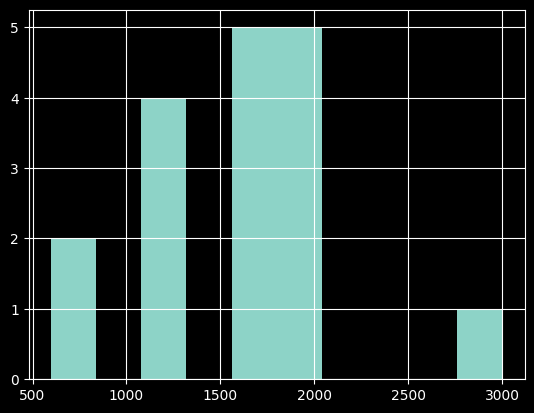

In [ ]:
#go back to engine capacity CC and crete groups
df.engine_capacity_cc.hist()

In [ ]:
def enginecap(eng_cc):
    if eng_cc <=1500:
        return "small engine cc"
    if eng_cc >1500 and eng_cc <=2000:
        return "medium engine cc"
    if eng_cc >2000:
        return "large engine cc"


df['engine_capacity_cc_size'] = df['engine_capacity_cc'].apply(enginecap)

In [ ]:
df.engine_capacity_cc_size.value_counts()

,count
engine_capacity_cc_size,
medium engine cc,10
small engine cc,6
large engine cc,1


In [ ]:

df['accident_seriousness'] = df['accident_severity']
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Slight",
                                                                value="Not Serious")
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Serious",
                                                                value="Serious")
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Fatal",
                                                                value="Serious")
df.shape

(17, 60)

In [ ]:
df.accident_seriousness.value_counts()

,count
accident_seriousness,
Not Serious,13
Serious,4


In [ ]:
df.to_pickle("df.pkl")

In [ ]:
df = pd.read_pickle("df.pkl")
df.head()

,accident_index,1st_road_class,1st_road_number,2nd_road_number,accident_severity,carriageway_hazards,date,day_of_week,did_police_officer_attend_scene_of_accident,junction_control,...,vehicle_type,was_vehicle_left_hand_drive,x1st_point_of_impact,month,weekend,hour,time_of_day,season,engine_capacity_cc_size,accident_seriousness
38426,201014B141110,A,633.0,633.0,Slight,Other object on road,2010-12-12,Sunday,1.0,Give way or uncontrolled,...,Car,No,Front,12,1,2,7,winter,medium engine cc,Not Serious
39824,201014K162410,A,6102.0,799.0,Serious,Other object on road,2010-06-10,Thursday,1.0,Give way or uncontrolled,...,Motorcycle,No,Front,6,0,5,7,summer,small engine cc,Serious
69006,201042I315109,B,1352.0,0.0,Slight,Other object on road,2010-09-30,Thursday,1.0,Not at junction or within 20 metres,...,Car,No,Front,9,0,21,6,fall,medium engine cc,Not Serious
70022,201042I429512,A,12.0,0.0,Serious,Other object on road,2010-12-28,Tuesday,1.0,Not at junction or within 20 metres,...,Car,No,Front,12,0,17,5,winter,medium engine cc,Serious
178403,2011460201831,Unclassified,3507.0,0.0,Slight,Vehicle load on road,2011-06-29,Wednesday,1.0,Give way or uncontrolled,...,Car,No,Front,6,0,13,3,summer,small engine cc,Not Serious
